<a href="https://colab.research.google.com/github/hifistelija/K_Means_Project/blob/main/02_Kmeans_Clustering_Project_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government.
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal:

### Gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent? *Note: There is no 100% right answer, make sure to watch the video for thoughts.*

----

## Imports and Data

**TASK: Run the following cells to import libraries and read in data.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CIA_Country_Facts.csv to CIA_Country_Facts.csv


In [3]:
df = pd.read_csv('CIA_Country_Facts.csv')

## Exploratory Data Analysis

**TASK: Explore the rows and columns of the data as well as the data types of the columns.**

In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [6]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


# Exploratory Data Analysis

Let's create some visualizations. Please feel free to expand on these with your own analysis and charts!

**TASK: Create a histogram of the Population column.**

<Axes: xlabel='Population', ylabel='Count'>

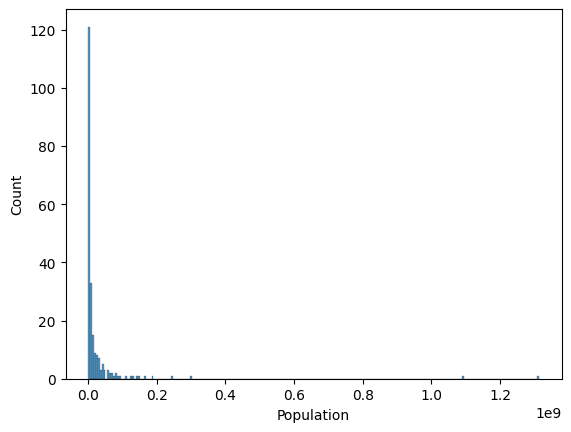

In [7]:
sns.histplot(data=df, x=df['Population'])

**TASK: You should notice the histogram is skewed due to a few large countries, reset the X axis to only show countries with less than 0.5 billion people**

<Axes: xlabel='Population', ylabel='Count'>

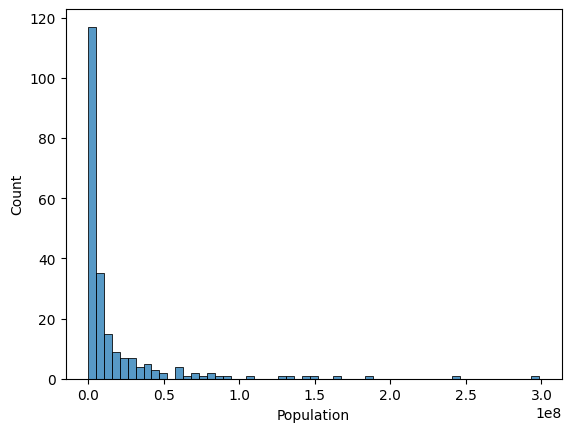

In [8]:
filtered_df = df[df['Population'] < 500000000]
sns.histplot(data=filtered_df, x=filtered_df['Population'])

**TASK: Now let's explore GDP and Regions. Create a bar chart showing the mean GDP per Capita per region (recall the black bar represents std).**

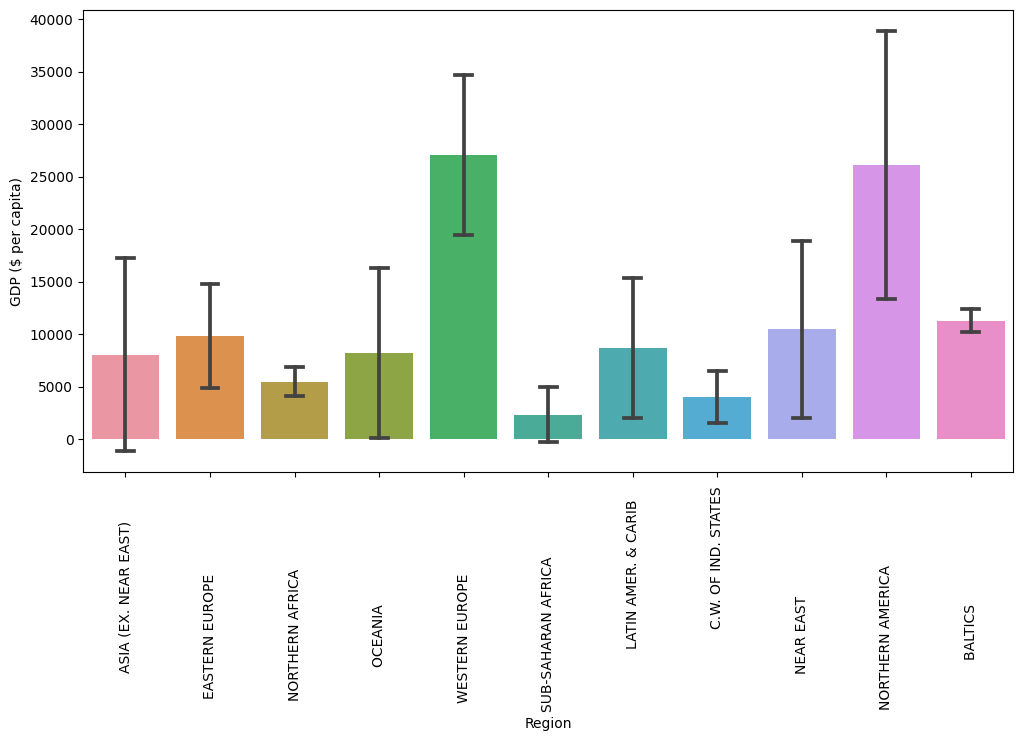

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='GDP ($ per capita)', data=df, errorbar='sd', capsize=.2)
plt.xticks(rotation=90);

**TASK: Create a scatterplot showing the relationship between Phones per 1000 people and the GDP per Capita. Color these points by Region.**

<Axes: xlabel='GDP ($ per capita)', ylabel='Phones (per 1000)'>

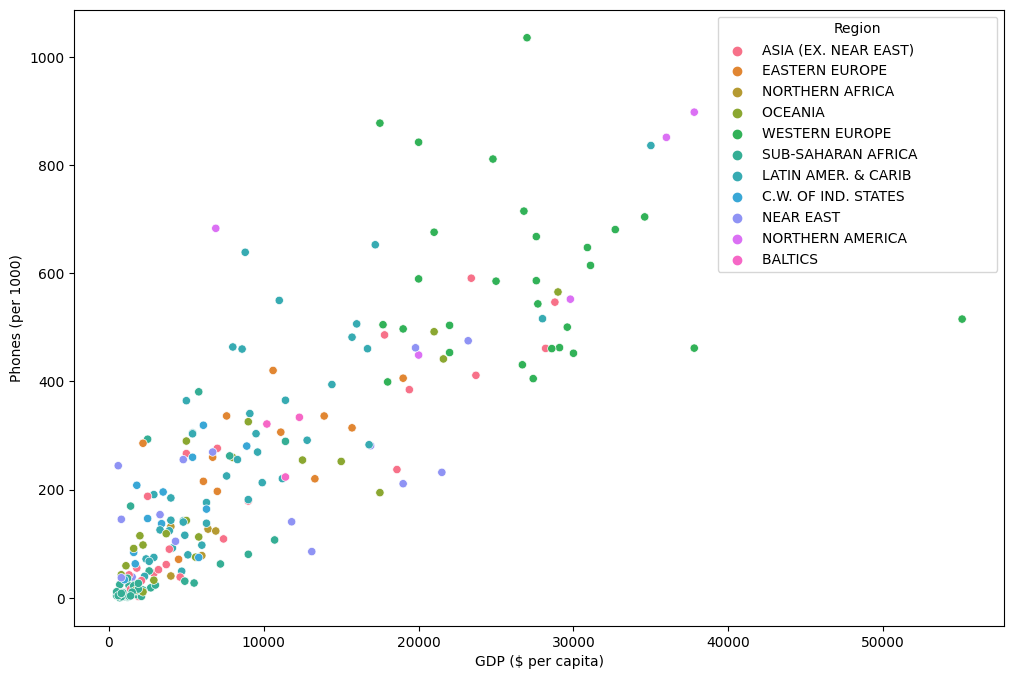

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Phones (per 1000)', hue='Region')

**TASK: Create a scatterplot showing the relationship between GDP per Capita and Literacy (color the points by Region). What conclusions do you draw from this plot?**

<Axes: xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

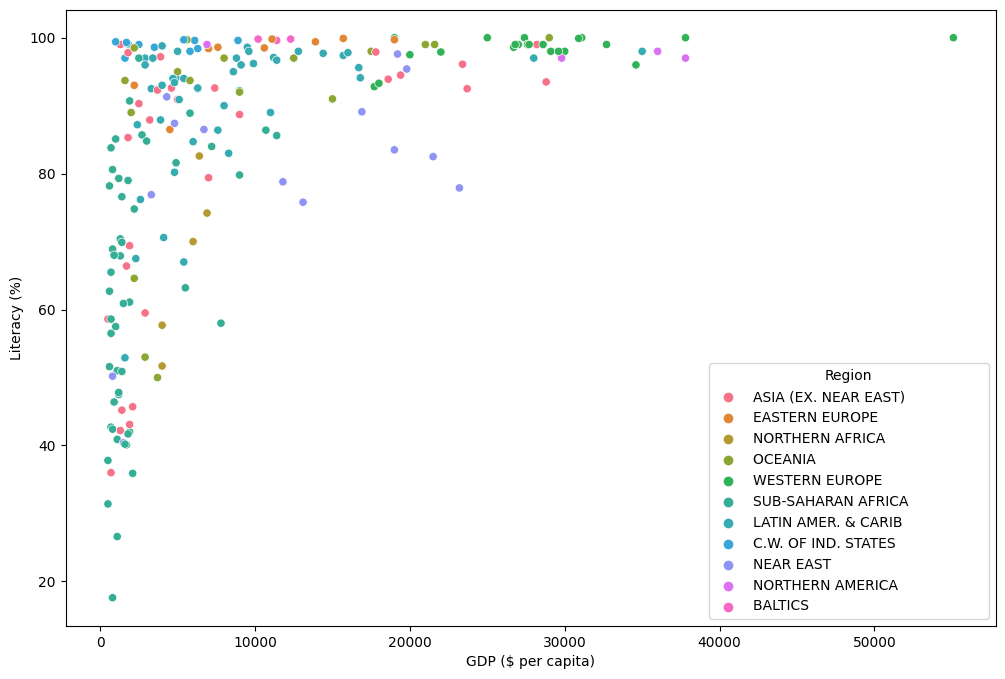

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Literacy (%)', hue='Region')

**TASK: Create a Heatmap of the Correlation between columns in the DataFrame.**

<ipython-input-12-20fe0d0692f4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='viridis')


<Axes: >

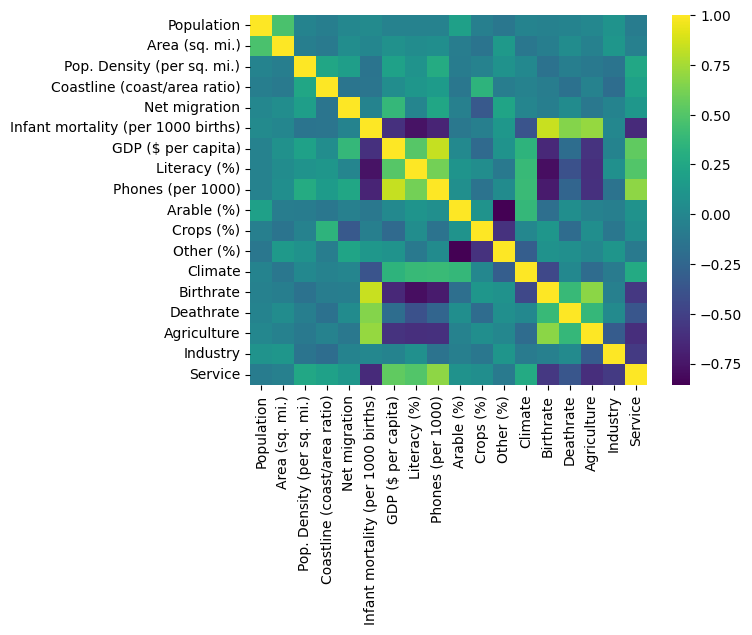

In [12]:
sns.heatmap(df.corr(), cmap='viridis')

**TASK: Seaborn can auto perform hierarchal clustering through the clustermap() function. Create a clustermap of the correlations between each column with this function.**

<ipython-input-13-ad95c5e1e007>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


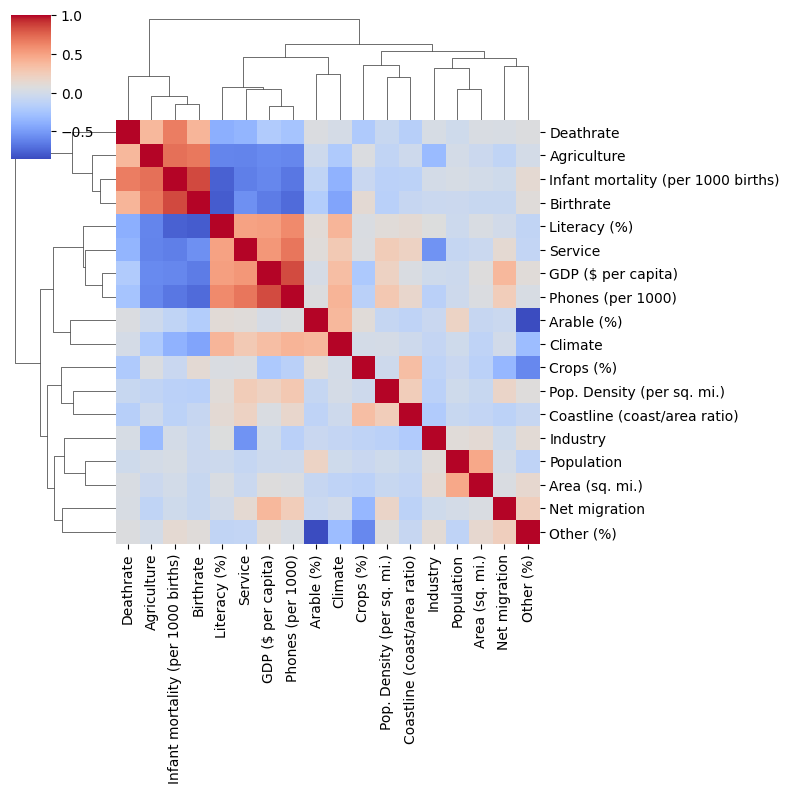

In [13]:
corr = df.corr()
sns.clustermap(corr, annot=False, cmap='coolwarm', figsize=(8, 8))

-----

## Data Preparation and Model Discovery

Let's now prepare our data for Kmeans Clustering!

### Missing Data

**TASK: Report the number of missing elements per column.**

In [14]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**

In [15]:
df[df['Agriculture'].isna()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**TASK: You should have noticed most of these countries are tiny islands, with the exception of Greenland and Western Sahara. Go ahead and fill any of these countries missing NaN values with 0, since they are so small or essentially non-existant. There should be 15 countries in total you do this for. For a hint on how to do this, recall you can do the following:**

    df[df['feature'].isnull()]
    

In [16]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

**TASK: Now check to see what is still missing by counting number of missing elements again per feature:**

In [17]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


In [18]:
mean_climate_by_region = df.groupby('Region')['Climate'].mean()

for region, mean_climate in mean_climate_by_region.items():
    df.loc[(df['Climate'].isna()) & (df['Region'] == region), 'Climate'] = mean_climate

**TASK: Check again on many elements are missing:**

In [19]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**TASK: It looks like Literacy percentage is missing. Use the same tactic as we did with Climate missing values and fill in any missing Literacy % values with the mean Literacy % of the Region.**

In [20]:
mean_literacy_by_region = df.groupby('Region')['Literacy (%)'].mean()

for region, mean_literacy in mean_literacy_by_region.items():
    df.loc[(df['Literacy (%)'].isna()) & (df['Region'] == region), 'Literacy (%)'] = mean_literacy

**TASK: Check again on the remaining missing values:**

In [21]:
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

**TASK: Optional: We are now missing values for only a few countries. Go ahead and drop these countries OR feel free to fill in these last few remaining values with any preferred methodology. For simplicity, we will drop these.**

In [22]:
df.dropna(inplace=True)

## Data Feature Preparation

**TASK: It is now time to prepare the data for clustering. The Country column is still a unique identifier string, so it won't be useful for clustering, since its unique for each point. Go ahead and drop this Country column.**

In [23]:
df.drop('Country', axis=1, inplace=True)

**TASK: Now let's create the X array of features, the Region column is still categorical strings, use Pandas to create dummy variables from this column to create a finalzed X matrix of continuous features along with the dummy variables for the Regions.**

In [24]:
# Storing orinal variables
original_features = df.select_dtypes(include=[np.number]).columns.tolist()

In [25]:
region_dummies = pd.get_dummies(df['Region'], drop_first=True)

In [26]:
# Final list of feature names after dummies
df_dummies = pd.get_dummies(df, columns=['Region'], drop_first=True)
final_features = df_dummies.columns.tolist()

In [27]:
df.drop('Region', axis=1, inplace=True)

In [28]:
X = pd.concat([df, region_dummies], axis=1)

In [29]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,NORTHERN AMERICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


### Scaling

**TASK: Due to some measurements being in terms of percentages and other metrics being total counts (population), we should scale this data first. Use Sklearn to scale the X feature matrics.**

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X_scaled = scaler.fit_transform(X)

In [33]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,NORTHERN AMERICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
0,0.013329,0.018554,-0.203087,-0.281437,4.731286,3.589712,-0.886390,-1.986763,-1.021310,-0.125055,...,-0.117309,-0.239617,-0.228869,-0.50565,-0.269844,-0.167054,-0.152145,-0.315440,-0.547723,-0.365148
1,-0.217301,-0.323709,-0.143785,-0.263919,-1.009080,-0.397691,-0.506851,0.232886,-0.711124,0.562077,...,-0.117309,-0.239617,4.369314,-0.50565,-0.269844,-0.167054,-0.152145,-0.315440,-0.547723,-0.365148
2,0.029051,0.977850,-0.229563,-0.280881,-0.077988,-0.130643,-0.357033,-0.492346,-0.679649,-0.808353,...,-0.117309,-0.239617,-0.228869,-0.50565,-0.269844,5.986095,-0.152145,-0.315440,-0.547723,-0.365148
3,-0.246881,-0.339501,-0.015428,0.528961,-4.245343,-0.742768,-0.157275,0.694397,0.147817,-0.288402,...,-0.117309,-0.239617,-0.228869,-0.50565,-0.269844,-0.167054,-0.152145,3.170173,-0.547723,-0.365148
4,-0.246768,-0.339352,-0.122496,-0.281437,1.355565,-0.889813,0.941391,0.826257,1.232099,-0.885041,...,-0.117309,-0.239617,-0.228869,-0.50565,-0.269844,-0.167054,-0.152145,-0.315440,-0.547723,2.738613


### Creating and Fitting Kmeans Model

**TASK: Use a for loop to create and fit multiple KMeans models, testing from K=2-30 clusters. Keep track of the Sum of Squared Distances for each K value, then plot this out to create an "elbow" plot of K versus SSD. Optional: You may also want to create a bar plot showing the SSD difference from the previous cluster.**

In [34]:
from sklearn.cluster import KMeans

In [ ]:
# List to store sum of squared distances
ssd = []
# Range of K values to test
K_range = range(2, 31)

# Fit KMeans for each k and calculate SSD
for k in K_range:
  kmeans = KMeans(n_clusters=k)
  kmeans = kmeans.fit(X_scaled)
  ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method to Find Optimal K')

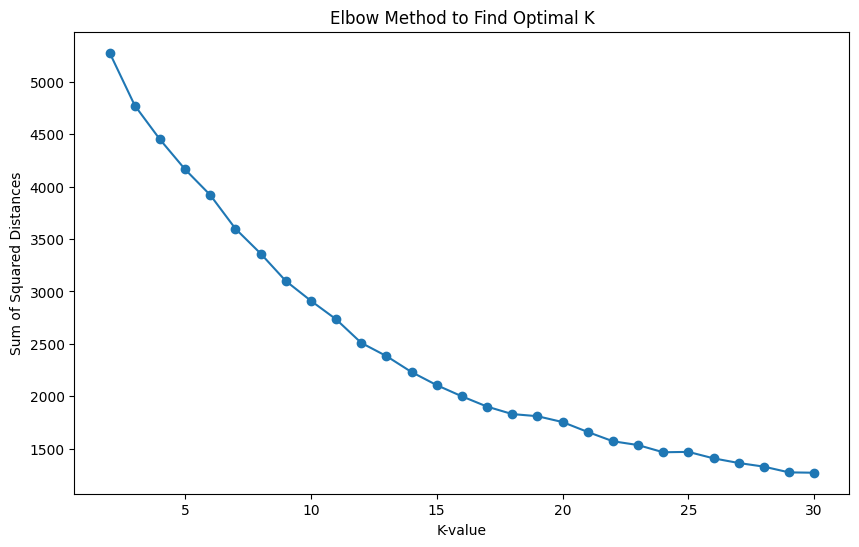

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(K_range, ssd, marker="o")
plt.xlabel('K-value')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method to Find Optimal K')

Text(0.5, 1.0, 'SSD Difference for Each K')

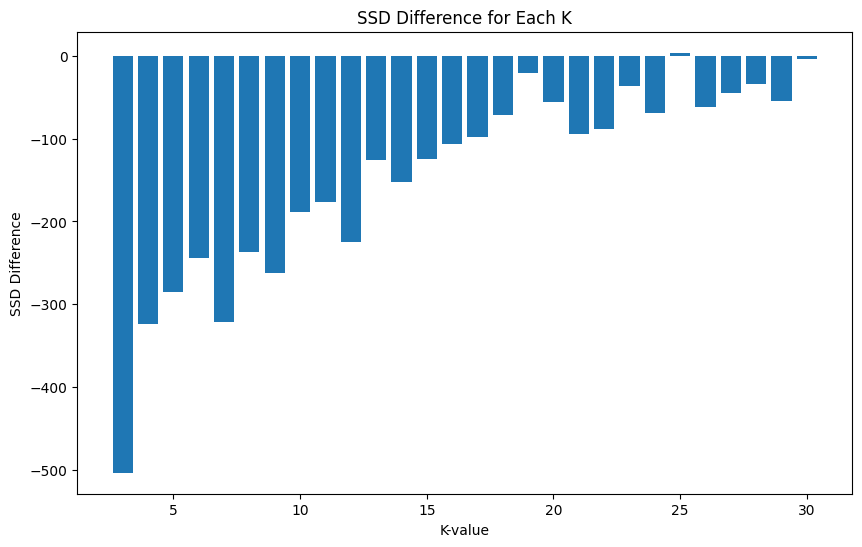

In [37]:
# Calculate the SSD difference from the previous cluster
ssd_diff = np.diff(ssd)

plt.figure(figsize=(10, 6))
plt.bar(K_range[1:], ssd_diff)
plt.xlabel('K-value')
plt.ylabel('SSD Difference')
plt.title('SSD Difference for Each K')

-----

# Model Interpretation


**TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices. As this is unsupervised learning, there is no 100% correct answer here. Please feel free to jump to the solutions for a full discussion on this!.**

In [ ]:
# Nothing to really code here, but choose a K value and see what features
# are most correlated to belonging to a particular cluster!

# Remember, there is no 100% correct answer here!

-----


#### Example Interpretation: Choosing K=3

**One could say that there is a significant drop off in SSD difference at K=3 (although we can see it continues to drop off past this). What would an analysis look like for K=3? Let's explore which features are important in the decision of 3 clusters!**

In [43]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [44]:
labels = kmeans.labels_
df['Cluster'] = labels

In [50]:
X['K=3 Clusters'] = kmeans.labels_

<Axes: >

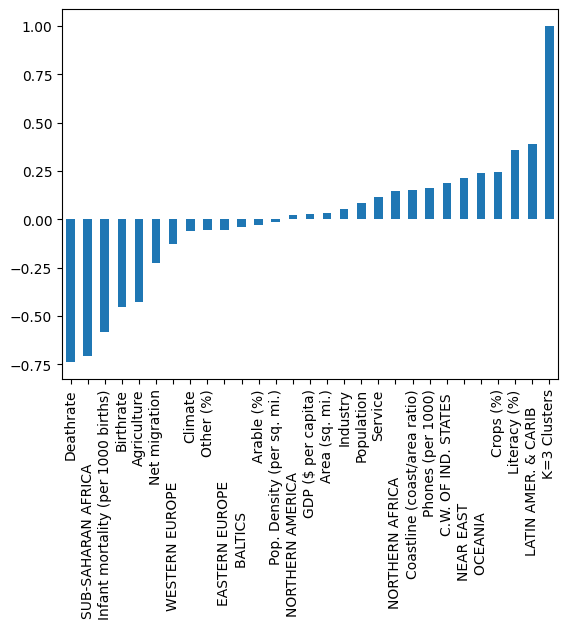

In [52]:
X.corr()['K=3 Clusters'].sort_values().plot(kind='bar')

In [45]:
centroids = kmeans.cluster_centers_
features = df.columns.tolist()

# Create a DataFrame for easier interpretation
df_centroids = pd.DataFrame(centroids, columns=final_features)

# Scale back the centroids to understand them in the original feature space
# If you used a StandardScaler, for example
centroids_original_space = scaler.inverse_transform(centroids)
df_centroids_original_space = pd.DataFrame(centroids_original_space, columns=final_features)

In [46]:
print(len(final_features))  # Should match the number of columns in centroids
print(centroids.shape[1])

28
28


In [49]:
cluster_summary = df.groupby('Cluster').mean()
cluster_summary

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Cluster,,,,,,,,,,,,,,,,,,
0,1.717572e+07,515077.803922,73.556863,1.505490,0.500980,88.004118,1905.882353,58.521569,15.615686,11.220196,2.464902,84.354510,1.846213,37.297255,15.838431,0.310235,0.263059,0.407255
1,1.954662e+07,593494.928571,788.142857,19.819107,2.624821,6.895714,22701.785714,96.095387,499.133929,19.630536,1.693393,78.676250,2.732617,10.790357,9.018571,0.038625,0.245179,0.662625
2,3.984307e+07,668244.710526,181.536842,28.833947,-1.532368,26.329561,6557.017544,84.031556,188.071053,12.013772,6.886491,81.098772,1.919006,20.778333,6.238421,0.117149,0.277421,0.511509


In [47]:
df.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,2
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,2
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,2
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,1


------------
-------------

# BONUS CHALLGENGE:
## Geographical Model Interpretation

The best way to interpret this model is through visualizing the clusters of countries on a map! **NOTE: THIS IS A BONUS SECTION.  YOU MAY WANT TO JUMP TO THE SOLUTIONS LECTURE FOR A FULL GUIDE, SINCE WE WILL COVER TOPICS NOT PREVIOUSLY DISCUSSED AND BE HAVING A NUANCED DISCUSSION ON PERFORMANCE!**

----
----

**IF YOU GET STUCK, PLEASE CHECK OUT THE SOLUTIONS LECTURE. AS THIS IS OPTIONAL AND COVERS MANY TOPICS NOT SHOWN IN ANY PREVIOUS LECTURE**

----
----

**TASK: Create cluster labels for a chosen K value. Based on the solutions, we believe either K=3 or K=15 are reasonable choices. But feel free to choose differently and explore.**

In [54]:
model = KMeans(n_clusters=15)
model.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=15)

**TASK: Let's put you in the real world! Your boss just asked you to plot out these clusters on a country level choropleth map, can you figure out how to do this? We won't step by step guide you at all on this, just show you an example result. You'll need to do the following:**

1. Figure out how to install plotly library: https://plotly.com/python/getting-started/

2. Figure out how to create a geographical choropleth map using plotly: https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries

3. You will need ISO Codes for this. Either use the wikipedia page, or use our provided file for this: **"../DATA/country_iso_codes.csv"**

4. Combine the cluster labels, ISO Codes, and Country Names to create a world map plot with plotly given what you learned in Step 1 and Step 2.


**Note: This is meant to be a more realistic project, where you have a clear objective of what you need to create and accomplish and the necessary online documentation. It's up to you to piece everything together to figure it out! If you get stuck, no worries! Check out the solution lecture.**



In [ ]:
!pip install plotly

In [57]:
from google.colab import files
uploaded = files.upload()

Saving country_iso_codes.csv to country_iso_codes.csv


In [58]:
iso_codes = pd.read_csv("country_iso_codes.csv")

In [59]:
iso_codes.head()

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA


In [60]:
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()

In [ ]:
iso_mapping

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 226
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          221 non-null    int64  
 1   Area (sq. mi.)                      221 non-null    int64  
 2   Pop. Density (per sq. mi.)          221 non-null    float64
 3   Coastline (coast/area ratio)        221 non-null    float64
 4   Net migration                       221 non-null    float64
 5   Infant mortality (per 1000 births)  221 non-null    float64
 6   GDP ($ per capita)                  221 non-null    float64
 7   Literacy (%)                        221 non-null    float64
 8   Phones (per 1000)                   221 non-null    float64
 9   Arable (%)                          221 non-null    float64
 10  Crops (%)                           221 non-null    float64
 11  Other (%)                           221 non-n

In [64]:
df['ISO Code'] = df['Country'].map(iso_mapping)

KeyError: ignored

In [ ]:
df['Cluster'] = model.labels_

In [ ]:
import plotly.express as px

fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )
fig.show()

---